## This is a tutorial about how to use the detection and embedding file!

## Before we started, make sure you run the file under the Kernel with these packages installed!

## numpy, scipy, Pillow

In [61]:
# you should be able to import these packages
import numpy as np
from PIL import Image
from scipy.spatial import distance

In [62]:
# Now let's load the detection and embedding file
detection = np.loadtxt('detection.txt',delimiter=',',dtype=None)
embedding = np.load('embedding.npy', allow_pickle=True)

# Each detection has a corresponding embedding feature, so the length should be the same!
assert len(detection) == len(embedding)
print('total number of detections : {}'.format(len(detection)))

total number of detections : 307857


In [63]:
# The detection file contains the detection from the five cameras. Let's take out the detection from the camera 74, which is our validation set.

inds = detection[:,0] == 74
val_detection = detection[inds]
val_embedding = embedding[inds]

assert len(val_detection) == len(val_embedding)
print('total number of detections in the validation set : {}'.format(len(val_detection)))

total number of detections in the validation set : 34821


In [64]:
# Sort the detection and embedding with frame ID
# Make sure to use argument sort!!! Otherwise the order between detection and embedding will not match!!

sort_inds = val_detection[:, 1].argsort()
val_detection = val_detection[sort_inds]
val_embedding = val_embedding[sort_inds]

# Now let's check the format of detection file.
# The format is <camera ID>, <Frame ID>, <class>, <x1>, <y1>, <x2>, <y2>, <confidence score>
# x1:left y1:upper x2:right y2:lower
# In the following example, we have camera ID = 74, Frame ID = 1, class = 1 (we only have 1 class which is human), x1 = 1625, y1 = 352, x2 = 1748, y2 = 708, and confidence score = 0.93

print([x for x in val_detection[0]])

[74.0, 0.0, 1.0, 1625.0, 352.0, 1748.0, 708.0, 0.93]


## Now let's do some visualization and see if the embedding feature is good!

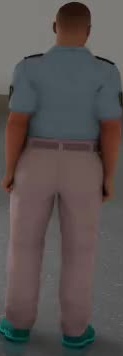

In [76]:
# Let's take the 3 detection from the validation set

camera,frame,_,x1,y1,x2,y2,_ = val_detection[3]

image1 = Image.open('c074/img/{}.jpg'.format('%05d'%frame)).crop((x1,y1,x2,y2))

image1

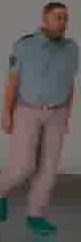

In [77]:
# Let's take the 2500 detection from the validation set

camera,frame,_,x1,y1,x2,y2,_ = val_detection[2500]

image2 = Image.open('c074/img/{}.jpg'.format('%05d'%frame)).crop((x1,y1,x2,y2))

image2

In [78]:
# The above two detection are from the same person! Their embedding feature's distance should be small!
# Let's check the embedding's cosine distance using the scipy spatial package!
print(distance.cosine(val_embedding[3],val_embedding[2500]))

0.0038573145866394043


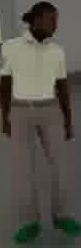

In [79]:
# What if we take another person's embedding...?
# Let's take the 3000 detection from the validation set

camera,frame,_,x1,y1,x2,y2,_ = val_detection[3000]

image3 = Image.open('c074/img/{}.jpg'.format('%05d'%frame)).crop((x1,y1,x2,y2))

image3

In [82]:
# This is not the same person as the original blue shirt man! 
# The embedding feature's cosine distance should be big between the 3 detection and the 3000 detection 
print(distance.cosine(val_embedding[3],val_embedding[3000]))

0.7647521942853928


## Now, you already have the embedding distance of each detections on the testing set, it's time for you to utilize these information and conduct tracking! Good luck!

In [70]:
# The code for extracting test set detection and embedding
inds = detection[:,0] == 75 # test set
test_detection = detection[inds]
test_embedding = embedding[inds]
sort_inds = test_detection[:, 1].argsort()
test_detection = test_detection[sort_inds]
test_embedding = test_embedding[sort_inds]